## Test that the Policy Gradient model learns to play tic tac toe: 

## 1. Using straightforward log-probability calculations: 

In [1]:
import numpy as np
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from clever_stochastician import clever_stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

G = G()

pg_model = policy_gradients(lr=0.1,seed=42,batch_size=30,p_est = 1)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=1000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Analyse the win-rate progression: 

In [2]:
learning = np.zeros(10)

for i in range(10):
    
    learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)
    
    print(learning[i])

0.72
0.75
0.63
0.62
0.74
0.77
0.74
0.68
0.78
0.6666666666666666


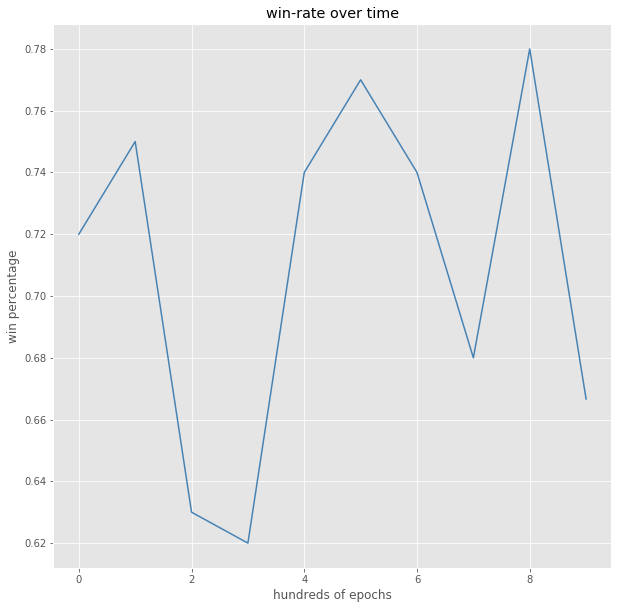

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

### The win rate appears to oscillate. Might it stabilise after enough epochs or a larger batch size?

## 2. Using an approximation to the maximum probability: 

In [1]:
import numpy as np
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from clever_stochastician import clever_stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

G = G()

pg_model = policy_gradients(lr=0.1,seed=42,batch_size=30,p_est = 2)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=1000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Analyse the win-rate progression: 

In [2]:
learning = np.zeros(10)

for i in range(10):
    
    learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)
    
    print(learning[i])

0.62
0.62
0.59
0.68
0.6
0.62
0.55
0.71
0.69
0.6767676767676768


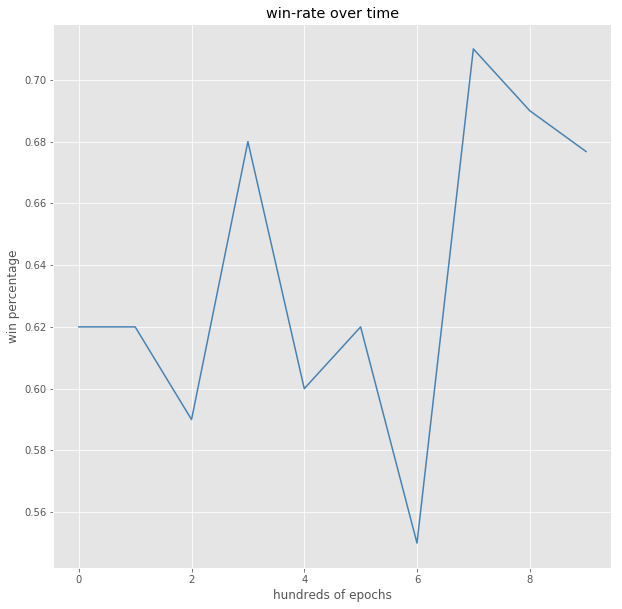

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

## 3. Using the Gumbel-Softmax trick: 

In [1]:
import numpy as np
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from clever_stochastician import clever_stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

G = G()

pg_model = policy_gradients(lr=0.1,seed=42,batch_size=30,p_est = 3)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=1000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Analyse the win-rate progression: 

In [2]:
learning = np.zeros(10)

for i in range(10):
    
    learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)
    
    print(learning[i])

0.74
0.74
0.69
0.71
0.72
0.75
0.73
0.65
0.71
0.6868686868686869


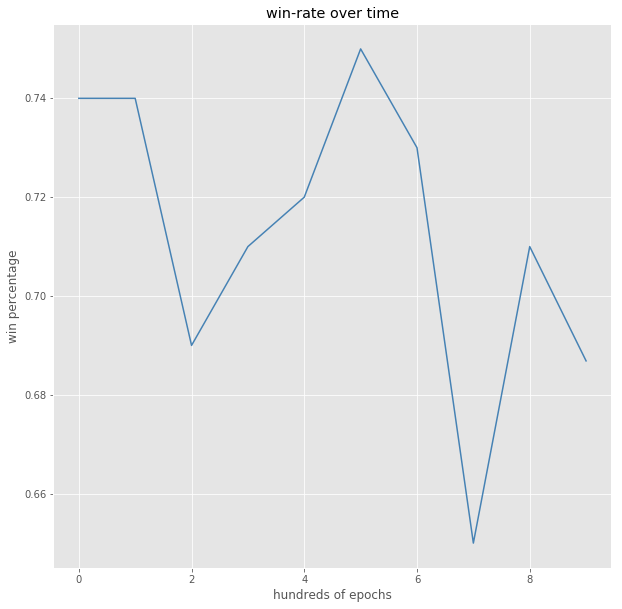

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

### In all three cases, learning appears to be really unstable. How can the situation be improved?